EQE512 MATRIX METHODS IN STRUCTURAL ANALYSIS 

---
<h3 align="center"><font color = red >Week 11 - Frame Systems - Dynamic Properties </font></h3> 

<h4 align="center"><font color = blue >Dr. Ahmet Anıl Dindar (adindar@gtu.edu.tr)</font></h4> 
<h4 align="center"><font color = green >2020 Fall</font></h4> 


---

**Let's calculate the modal parameters of the given MDOF system**

<center><img src="./figures/15-EQE512-Week12-MDOF_Frame-Generic.PNG" width=25% , alignment = "center"> </img><\center>

This code is composed of two (2) main parts, namely 

1- Hand Calculation

2- OpenSeesPy

---

# Hand Calculations
<center><img src="./figures/15-EQE512-Week12-MDOF_Frame-Values.PNG" width=40% , alignment = "center"> </img><\center>

Material is C25 ($E = 32GPA$)

In [2]:
E = 32_000_000 # kN/m2

conc_weight = 25 # kN/m

UDL = 10 # kN/m

g = 9.81 # m7s2

# *********************** GEOMETRY
L , H1 , H2 , h_beam , b_beam, h_col , b_col = 5 , 3 , 3, 0.5 , 0.2 , 0.5 , 0.5 # m

**Mass Matrix**

In [4]:
# Load on beam
beam_load = UDL * L
beam_sw = ( h_beam * b_beam * L) * conc_weight

In [5]:
# Load on columns
column_sw = (h_col * b_col * H1) * conc_weight

In [11]:
# Mass of stories
M1 = ( 4 * column_sw / 2 + beam_load + beam_sw) / g
M1 = round( M1 ,2)

M2 = ( 2 * column_sw / 2 + beam_load + beam_sw) / g
M2 = round( M2 ,2)

In [12]:
# CONSTRUCT THE MASS MATRIX

import numpy as np

Mass_sys = np.array( [[ M1, 0] , [ 0, M2]])

print( Mass_sys)

[[10.19  0.  ]
 [ 0.    8.28]]


**Stiffness Matrix**

In [17]:
Mom_inertia = (b_col * h_col **3 ) / 12

K1 = 2 * (( 12 * E * Mom_inertia)/ ( H1**3))
K1 = round( K1 ,0)

K2 = 2 * (( 12 * E * Mom_inertia)/ ( H2**3))
K2 = round( K2 ,0)

In [18]:
# CONSTRUCT THE SYSTEM STIFFNESS MATRIX
K_sys = np.array( [[K1 + K2 , -K2],[-K2 , K2]])

print( K_sys)

[[ 296296. -148148.]
 [-148148.  148148.]]


**Calculation of the Natural Circular Frequencies**


<center><img src="./images/EQE512-Week11-NaturalFrequencies.png" width=25% , alignment = "center"> </img><\center>

In [20]:
# Calculation of natural circular frequencies

w2 = np.dot( np.linalg.inv( Mass_sys) , K_sys)

print( w2)

[[ 29077.13444553 -14538.56722277]
 [-17892.2705314   17892.2705314 ]]


In [21]:
# Calculaiton of mode shape vectors and values

V , D = np.linalg.eigh( w2)

In [22]:
V

array([ 4738.80587179, 42230.59910515])

In [23]:
D

array([[-0.59231397, -0.80570724],
       [-0.80570724,  0.59231397]])

In [24]:
w = [ item**0.5 for item in V]
w

[68.83898511590421, 205.50084940249792]

In [30]:
T = [ round( 2* (22/7) / item ,2)  for item in w]
for count, item in enumerate( T ) :
    print( f"{count+1} Mode Period is {item}sec.")

1 Mode Period is 0.09sec.
2 Mode Period is 0.03sec.


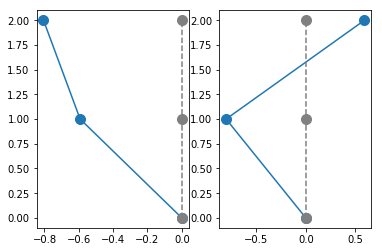

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

for mode_no , mode_shape in enumerate( D ):
    
    vector = list(D[:][mode_no])
    vector.insert(0,0)
    plt.subplot( 1,len(Mass_sys), mode_no + 1)
    plt.plot( vector , range(len(Mass_sys)+1) , "o-" , MS = 10)
    plt.plot( [0 for item in range( len(Mass_sys)+1) ], range(len(Mass_sys)+1) , "o--" , MS = 10 ,color="gray")


# OPENSEESPY

to be added...

---

**NEXT WEEK**

<table >
<tr>
<td>
<img src="http://worshiphousemedia.s3.amazonaws.com/images/main/s/st/bnt/st/seeyounextweek1.jpg" width="40%">
</td>
<td align="left"><strong style="font-size: 20px;">
The topics for the next week 
<br><br>

1- Assignment : 4
    
2- System behavior
<br><br>

<br>
</td>
</tr>
</table>